# Functions

In [93]:
def get_words(line):
    r'''
    This function takes a text and returns
    a list of lowercase words. It removes all digits
    and strips punctuation characters from the words.
    
    >>> get_words('Here are severall1000 words!\n Blub')
    ['here', 'are', 'severall', 'words', 'blub']
    
    >>> get_words('"Where are they? 10 \t 1000!?"')
    ['where', 'are', 'they']
    
    >>> get_words('\t\t\t\r\r\r\n<ada> hallo12 \r\t\t\t\t')
    ['ada', 'hallo']
    
    '''
    import re
    line = re.sub('\s*[\r\t]+','',line)
    line = re.sub('[^a-zA-Z\s\'-]+','',line)
    line = line.lower()
    
    words = line.split()
    return words

if __name__ == '__main__':
    import doctest
    doctest.testmod()

# Data Import

In [146]:
import pandas as pd
import json
from collections import Counter

# Columns which shall be kept from the downloaded data
columns = ['job_title', 'employer', 'origin', 'location',
           'salary', 'job_type', 'job_description',]

# Keywords to check for in the job description. Each keyword 
# gets its own column with True and False values.
keywords = ['python', 'java', 'perl', 'r', 'fortran', 'sql',
            'html', 'css', 'javascript', 'c', 'c++', 'c#',
            'bioinformatician', 'bioinformatics',
            'researcher', 'details', 'skills', 'successful'
            'program', 'expected', 'strong']

# load nature jobs
with open('jobspiders/nature_jobs.json', 'r') as myfile:
    nature_jobs = json.load(myfile)

# load science jobs
with open('jobspiders/science_jobs.json', 'r') as myfile:
    science_jobs = json.load(myfile)

# Count words and add an orign entry to the science data
for entry in science_jobs:
    entry['job_description_words'] = Counter(get_words(entry['job_description']))
    entry['origin'] = 'science'

# Count words and add an orign entry to the nature data
for entry in nature_jobs:
    entry['job_description_words'] = Counter(get_words(entry['job_description']))
    entry['origin'] = 'nature'

# Combine the job data from science and nature
job_data = science_jobs+nature_jobs

# Add the entries for the keywords
for entry in job_data:
    for keyword in keywords:
        if keyword in entry['job_description_words'].keys():
            entry[keyword] = entry['job_description_words'][keyword]
        else:
            entry[keyword] = 0

# Read the data into a dataframe and select the specified columns
df = pd.DataFrame(job_data)
df = df[columns+keywords]

# Inspect data

In [95]:
len(df)

3109

## Remove duplicates

In [151]:
print(len(df[df.duplicated()==True]))
df1 = df[df.duplicated()==False]

33


In [152]:
print(len(df1[df1.duplicated(subset=['job_title', 'employer',
                                   ])==True]))
print(len(df1[df1.duplicated(subset=['job_title', 'employer',
                                   'researcher', 'details',
                                   'skills', 'successful'
                                   'program', 'expected',
                                   'strong'])==True]))

90
51


In [155]:
df[:10]

,job_title,employer,origin,location,salary,job_type,job_description,python,java,perl,...,c++,c#,bioinformatician,bioinformatics,researcher,details,skills,successfulprogram,expected,strong
0,2 Leading Positions at SciLifeLab,SciLifeLab,science,"Uppsala, Sweden (SE)",Undisclosed,Psychiatry/Psychology,Discover the Future – 2 Leading Positions at S...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Novo Nordisk Foundation Young Investigator Awards,The Novo Nordisk Foundation,science,Denmark (DK),-,Biotechnology,YOUNG INVESTIGATOR AWARDS\nSUPPORTING TOMORROW...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Call for Global Talents,Nankai University,science,China (CN),"Annual salary of 400,000-1,200,000 RMB (pre-ta...",Other,Call for Global Talents\nNational Thousand (Yo...,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,Mobile DNA Postdoctoral Position at the NIH,NIH-NICHD,science,"NIH Campus, Bethesda, Maryland",Salary is commensurate with experience (www.tr...,Postdoc Fellowship,A postdoctoral position is available in the Se...,0,0,0,...,0,0,0,1,0,2,1,0,1,0
4,Communication Officer,Cluster of Excellence CellNetworks at Heidelbe...,science,"Heidelberg, Baden-Württemberg (DE)",provided a two-year contract including salary ...,Organic Chemistry,Postdoctoral Positions\r\nNext Call Opens Spri...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Research Assistant Professor,"University of Nebraska - Lincoln, Nutrition an...",science,"Lincoln, Nebraska",Salary for the position is commensurate with e...,Faculty,Research Assistant Professor\nNebraska Center ...,0,0,0,...,0,0,0,3,0,1,2,0,3,4
6,Admission in Fellowship and M.Phil in Regenera...,West Bengal University of Health Sciences http...,science,"School of Tropical medicine, Kolkata, West Ben...","Competitive stipend is 3,37,836 Indian Rupees ...",Student Fellowship,Admission in Fellowship and M.Phil in Regenera...,0,0,0,...,0,0,0,0,0,1,1,0,1,0
7,"Assistant, Associate, or Full Professor",University of Illinois - Chicago,science,"Chicago, Illinois",Highly competitive salary and start-up package...,Other,Assistant/Associate/Full Professor –\r\nPhysio...,0,0,0,...,0,0,0,0,0,0,0,0,1,2
8,Assistant Professor Industrial and Physical Ph...,Purdue University West Lafayette,science,"West Lafayetter, Indiana (US)",Undisclosed,Faculty,Faculty Opening in Industrial and Physical Pha...,0,0,0,...,0,0,0,0,0,0,0,0,2,0
9,Senior Research Scientist,Children's Research Institute at UTSW,science,"Dallas, TX",Salary commensurate with experience.,Senior Scientist,Metabolism in stem cell biology and disease\nC...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
len(df[df.duplicated(subset=['job_description'])==True])

51

In [71]:
set(df[df['origin']=='science']['job_type'])

{'Academic Dean/Dept. Head',
 'Agricultural Science',
 'Bioinformatics',
 'Biology',
 'Biotechnology',
 'Cell Biology',
 'Chemistry',
 'Clinical Research',
 'Economics/Political Science',
 'Education',
 'Engineering',
 'Faculty',
 'Full Time',
 'Genetics',
 'Genomics',
 'Group Leader/Principal Investigator',
 'Healthcare',
 'History & Philosophy of Sci',
 'Immunology',
 'Lecturer/Senior Lecturer',
 'Legal/Regulatory Affairs',
 'Life Sciences',
 'Manager',
 'Manufacturing/QA/QC',
 'Marine Science',
 'Mathematics',
 'Medical Doctor',
 'Medical Engineering',
 'Medicine',
 'Microbiology',
 'Molecular Biology',
 'Neuroscience',
 'Oceanography',
 'Organic Chemistry',
 'Other',
 'Other Chemistry',
 'Other Life Science',
 'Pathology',
 'Personalized Medicine',
 'PhD Fellowship',
 'PhD Studentship',
 'Pharmacology',
 'Physics',
 'Postdoc',
 'Postdoc Fellowship',
 'President/CEO/Director/VP',
 'Project Manager',
 'Proteomics',
 'Psychiatry/Psychology',
 'Public Health',
 'Regenerative Medicine',

In [16]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


In [62]:
df.columns.values

array(['job_title', 'employer', 'origin', 'location', 'salary', 'job_type',
       'job_description', 'job_description_words', 'python', 'java',
       'perl', 'r', 'fortran', 'sql', 'html', 'css', 'javascript', 'c',
       'c++', 'c#', 'bioinformatician', 'bioinformatics'], dtype=object)

In [64]:
len(df[df.duplicated(subset=['job_title', 'employer', 'salary'])==True])

116

# Question 1: Which programming languages are mentioned most in job ads for bioinformaticians?

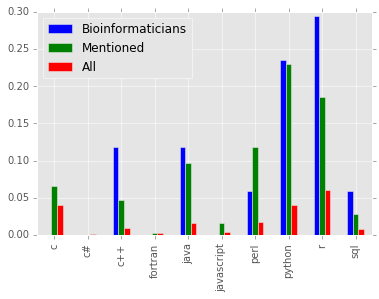

In [65]:
bioinformatician = df.loc[df['job_type'] == 'Bioinformatician']
bio = bioinformatician[['java', 'python', 'perl', 'r', 
                        'fortran','sql', 'javascript', 'c++', 'c', 'c#']]

mentioned_bioinf = df.loc[df['bioinformatics']]
mentioned_bioinf = mentioned_bioinf[['java', 'python', 'perl', 'r', 
                        'fortran','sql', 'javascript', 'c++', 'c', 'c#']]

#print(bioinformatician.ix[262][['job_description']])
#print(bioinformatician.loc[26, 'job_description'])

all_jobs = df[['java', 'python', 'perl', 'r', 
               'fortran', 'javascript', 'c++', 'c', 'c#','sql']]

plotframe = pd.concat([bio.sum()/len(bio),
                       mentioned_bioinf.sum()/len(mentioned_bioinf),
                       all_jobs.sum()/len(all_jobs)], axis=1)

plotframe.set_index(bio.sum().index)
plotframe = plotframe.rename(index = str, columns={0:'Bioinformaticians',
                                                   1:'Mentioned',
                                                   2:'All'})
plotframe.plot(kind='bar')

In [ ]:
df['sql']